In [ ]:
!pip install tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

import os
import zipfile
import random
import shutil

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.efficientnet import EfficientNetB7
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
if not os.path.isdir('C:\Users\usung\apple-tomato-classification\apple-tomato-data'):
  zip = zipfile.ZipFile('C:\Users\usung\apple-tomato-classification\apple_tomato.zip', 'r')
  zip.extractall('C:\Users\usung\apple-tomato-classification\apple-tomato-data')
  zip.close()

In [5]:
main_dir = '/content/drive/MyDrive/pop/apple-tomato-classification/apple-tomato-data'
train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')

In [6]:
labels = {
    'tomatoes': 0,
    'apples': 1
}

In [7]:
from skimage.io import imread
from skimage.transform import resize
IMAGE_SIZE = (224,224,3)
train_images = []
train_labels = []

for image_label in os.listdir(train_dir):
  image_dir = os.path.join(train_dir, image_label)
  for image_title in os.listdir(image_dir):
      image_path = os.path.join(image_dir, image_title)
      image = imread(image_path)
      image = resize(image, IMAGE_SIZE)
      train_images.append(image)
      train_labels.append(labels[image_label]) # apples이미지가 append되면 라벨도 같이 

In [8]:
test_images = []
test_labels = []

for image_label in os.listdir(test_dir):
  image_dir = os.path.join(test_dir, image_label)
  for image_title in os.listdir(image_dir):
      image_path = os.path.join(image_dir, image_title)
      image = imread(image_path)
      image = resize(image, IMAGE_SIZE)
      test_images.append(image)
      test_labels.append(labels[image_label])

In [9]:
X_train = np.array(train_images)
X_test = np.array(test_images)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [10]:
resnet = ResNet50(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)
vgg = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)
xception = Xception(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)
resnet101 = ResNet101(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)
inception = InceptionV3(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)
efficientnet = EfficientNetB7(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

258076736/258076736 [==============================] - 9s 0us/step


In [11]:
model_dict = {
    'resnet50': resnet,
    'vgg16': vgg,
    'xception': xception,
    'resnet101': resnet101,
    'inception': inception,
    'mobilenet': mobilenet,
    'efficientnetB7': efficientnet
}
model_dict

{'resnet50': <keras.engine.functional.Functional at 0x7f0afc578fa0>,
 'vgg16': <keras.engine.functional.Functional at 0x7f0afc0f2ca0>,
 'xception': <keras.engine.functional.Functional at 0x7f0ae5700910>,
 'resnet101': <keras.engine.functional.Functional at 0x7f0ae5334040>,
 'inception': <keras.engine.functional.Functional at 0x7f0ae5025f40>,
 'mobilenet': <keras.engine.functional.Functional at 0x7f0ae4dcbb20>,
 'efficientnetB7': <keras.engine.functional.Functional at 0x7f0ae424b820>}

In [12]:
for key, netModel in model_dict.items():
    for layer in netModel.layers:
        layer.trainable = False

In [62]:
epoch_runs = range(1, 21)
history_list = []
model_keys = list(model_dict.keys())

val_acc_list = []


In [57]:
model_key

['resnet50',
 'vgg16',
 'xception',
 'resnet101',
 'inception',
 'mobilenet',
 'efficientnetB7']

Epoch 1/20
10/10 [==============================] - 6s 360ms/step - loss: 14.3154 - accuracy: 0.5170 - val_loss: 1.4488 - val_accuracy: 0.5567
Epoch 2/20
10/10 [==============================] - 1s 126ms/step - loss: 2.0368 - accuracy: 0.4286 - val_loss: 0.6821 - val_accuracy: 0.6289
Epoch 3/20
10/10 [==============================] - 1s 127ms/step - loss: 0.6958 - accuracy: 0.5612 - val_loss: 0.6833 - val_accuracy: 0.5670
Epoch 4/20
10/10 [==============================] - 1s 127ms/step - loss: 0.6842 - accuracy: 0.5714 - val_loss: 0.6930 - val_accuracy: 0.5464
Epoch 5/20
10/10 [==============================] - 1s 126ms/step - loss: 0.6928 - accuracy: 0.5578 - val_loss: 0.6928 - val_accuracy: 0.5464
Epoch 6/20
10/10 [==============================] - 1s 128ms/step - loss: 0.6927 - accuracy: 0.5578 - val_loss: 0.6926 - val_accuracy: 0.5464
Epoch 7/20
10/10 [==============================] - 1s 128ms/step - loss: 0.6925 - accuracy: 0.5578 - val_loss: 0.6925 - val_accuracy: 0.5464
Epoch

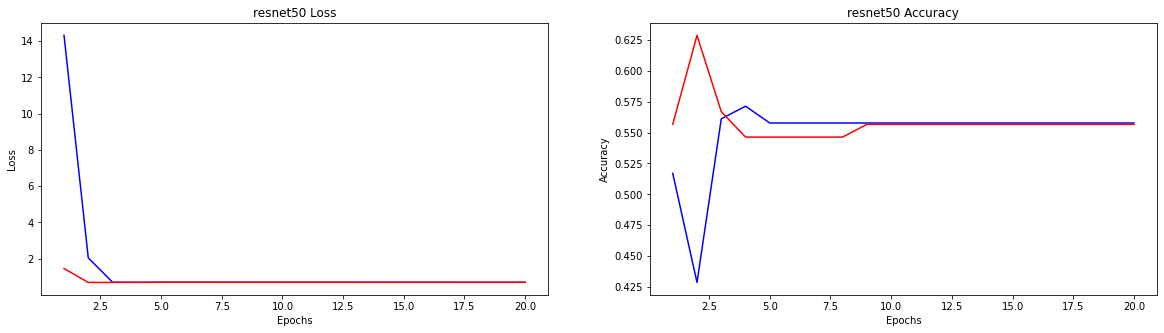

Epoch 1/20
10/10 [==============================] - 3s 241ms/step - loss: 3.0289 - accuracy: 0.6531 - val_loss: 0.8924 - val_accuracy: 0.7629
Epoch 2/20
10/10 [==============================] - 2s 192ms/step - loss: 0.9814 - accuracy: 0.7687 - val_loss: 0.6130 - val_accuracy: 0.8144
Epoch 3/20
10/10 [==============================] - 2s 193ms/step - loss: 0.1990 - accuracy: 0.9490 - val_loss: 0.6514 - val_accuracy: 0.8660
Epoch 4/20
10/10 [==============================] - 2s 193ms/step - loss: 0.1119 - accuracy: 0.9626 - val_loss: 0.6270 - val_accuracy: 0.8454
Epoch 5/20
10/10 [==============================] - 2s 193ms/step - loss: 0.0532 - accuracy: 0.9728 - val_loss: 0.6108 - val_accuracy: 0.8454
Epoch 6/20
10/10 [==============================] - 2s 194ms/step - loss: 0.0224 - accuracy: 0.9864 - val_loss: 0.6501 - val_accuracy: 0.8351
Epoch 7/20
10/10 [==============================] - 2s 195ms/step - loss: 0.0120 - accuracy: 0.9966 - val_loss: 0.6132 - val_accuracy: 0.8557
Epoch 

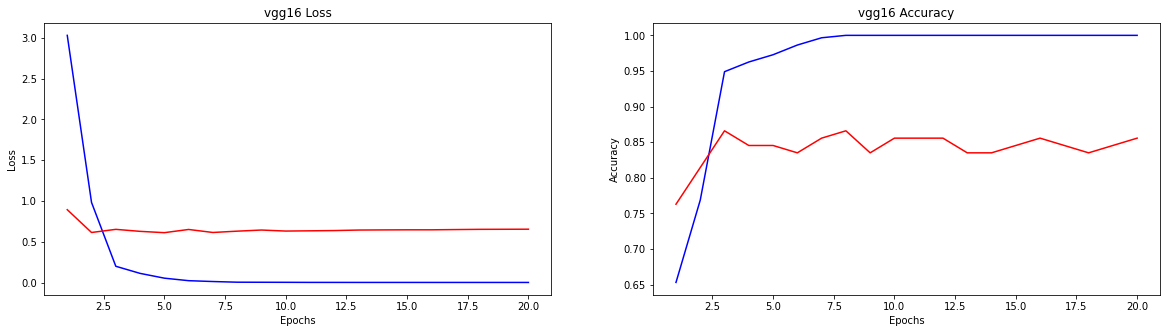

Epoch 1/20
10/10 [==============================] - 5s 283ms/step - loss: 4.9825 - accuracy: 0.7619 - val_loss: 5.4203 - val_accuracy: 0.8144
Epoch 2/20
10/10 [==============================] - 2s 167ms/step - loss: 1.6179 - accuracy: 0.9320 - val_loss: 3.9808 - val_accuracy: 0.8351
Epoch 3/20
10/10 [==============================] - 2s 167ms/step - loss: 1.0372 - accuracy: 0.9388 - val_loss: 5.1229 - val_accuracy: 0.7938
Epoch 4/20
10/10 [==============================] - 2s 194ms/step - loss: 0.3340 - accuracy: 0.9796 - val_loss: 5.1865 - val_accuracy: 0.8351
Epoch 5/20
10/10 [==============================] - 2s 196ms/step - loss: 0.2060 - accuracy: 0.9898 - val_loss: 4.3335 - val_accuracy: 0.8557
Epoch 6/20
10/10 [==============================] - 2s 167ms/step - loss: 0.0301 - accuracy: 0.9898 - val_loss: 4.7294 - val_accuracy: 0.8454
Epoch 7/20
10/10 [==============================] - 2s 168ms/step - loss: 0.0068 - accuracy: 0.9932 - val_loss: 4.5777 - val_accuracy: 0.8557
Epoch 

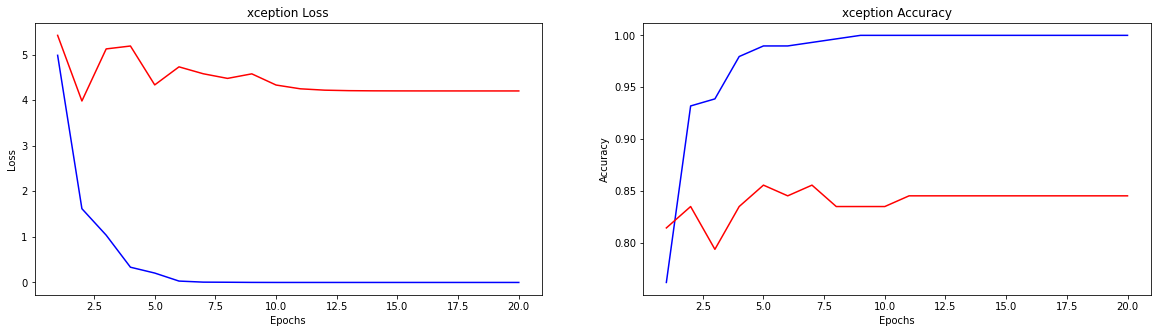

Epoch 1/20
10/10 [==============================] - 9s 439ms/step - loss: 6.9739 - accuracy: 0.5136 - val_loss: 1.0623 - val_accuracy: 0.4433
Epoch 2/20
10/10 [==============================] - 2s 230ms/step - loss: 0.7639 - accuracy: 0.5442 - val_loss: 0.5956 - val_accuracy: 0.7423
Epoch 3/20
10/10 [==============================] - 2s 217ms/step - loss: 0.5878 - accuracy: 0.6939 - val_loss: 0.6044 - val_accuracy: 0.6907
Epoch 4/20
10/10 [==============================] - 2s 222ms/step - loss: 0.5766 - accuracy: 0.7143 - val_loss: 0.6855 - val_accuracy: 0.5567
Epoch 5/20
10/10 [==============================] - 2s 205ms/step - loss: 0.6452 - accuracy: 0.6395 - val_loss: 0.6405 - val_accuracy: 0.6598
Epoch 6/20
10/10 [==============================] - 2s 205ms/step - loss: 0.6325 - accuracy: 0.6531 - val_loss: 0.5366 - val_accuracy: 0.7320
Epoch 7/20
10/10 [==============================] - 2s 206ms/step - loss: 0.5240 - accuracy: 0.7415 - val_loss: 0.5387 - val_accuracy: 0.7113
Epoch 

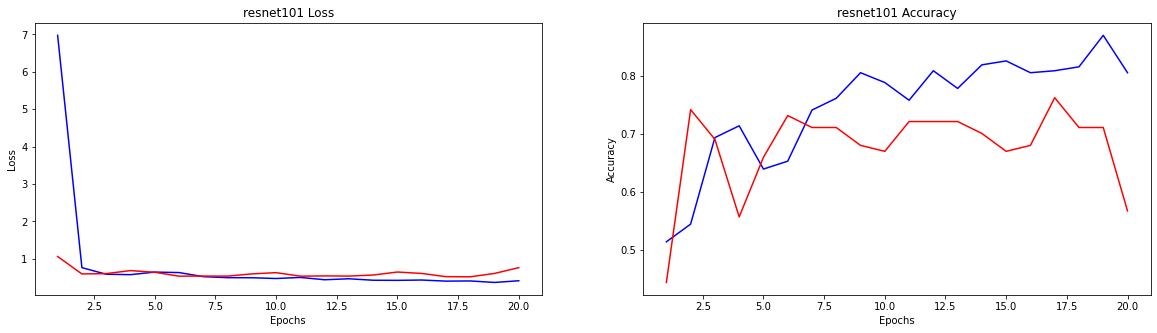

Epoch 1/20
10/10 [==============================] - 7s 244ms/step - loss: 6.8524 - accuracy: 0.7415 - val_loss: 4.6854 - val_accuracy: 0.7629
Epoch 2/20
10/10 [==============================] - 1s 102ms/step - loss: 1.4288 - accuracy: 0.8912 - val_loss: 4.3163 - val_accuracy: 0.7835
Epoch 3/20
10/10 [==============================] - 1s 104ms/step - loss: 2.2502 - accuracy: 0.8639 - val_loss: 1.3689 - val_accuracy: 0.8866
Epoch 4/20
10/10 [==============================] - 1s 100ms/step - loss: 0.3711 - accuracy: 0.9660 - val_loss: 1.2657 - val_accuracy: 0.8969
Epoch 5/20
10/10 [==============================] - 1s 101ms/step - loss: 0.1004 - accuracy: 0.9864 - val_loss: 1.2209 - val_accuracy: 0.9072
Epoch 6/20
10/10 [==============================] - 1s 102ms/step - loss: 0.0067 - accuracy: 0.9966 - val_loss: 1.9448 - val_accuracy: 0.8969
Epoch 7/20
10/10 [==============================] - 1s 103ms/step - loss: 2.2146e-05 - accuracy: 1.0000 - val_loss: 1.7489 - val_accuracy: 0.9072
Ep

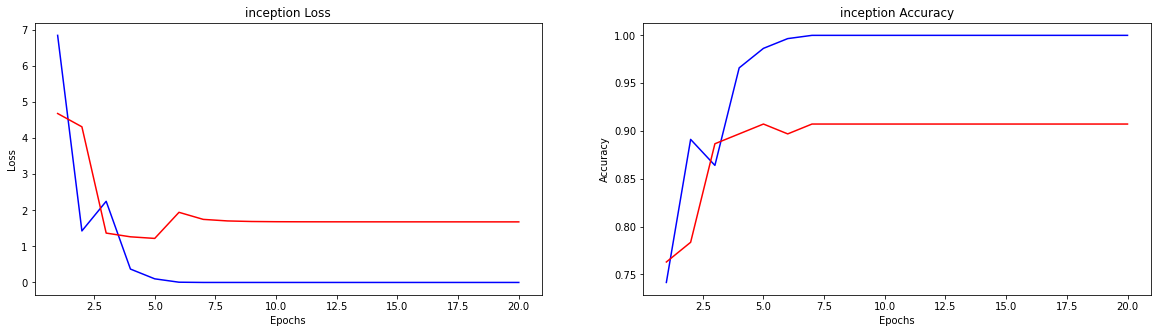

Epoch 1/20
10/10 [==============================] - 4s 178ms/step - loss: 5.6703 - accuracy: 0.7517 - val_loss: 1.5266 - val_accuracy: 0.8454
Epoch 2/20
10/10 [==============================] - 1s 62ms/step - loss: 0.8936 - accuracy: 0.9150 - val_loss: 4.9215 - val_accuracy: 0.6907
Epoch 3/20
10/10 [==============================] - 1s 60ms/step - loss: 0.5032 - accuracy: 0.9456 - val_loss: 2.0603 - val_accuracy: 0.8454
Epoch 4/20
10/10 [==============================] - 1s 61ms/step - loss: 0.0864 - accuracy: 0.9966 - val_loss: 2.4275 - val_accuracy: 0.8557
Epoch 5/20
10/10 [==============================] - 1s 63ms/step - loss: 0.0147 - accuracy: 0.9966 - val_loss: 2.7625 - val_accuracy: 0.8454
Epoch 6/20
10/10 [==============================] - 1s 62ms/step - loss: 6.9182e-05 - accuracy: 1.0000 - val_loss: 2.4683 - val_accuracy: 0.8454
Epoch 7/20
10/10 [==============================] - 1s 60ms/step - loss: 2.5310e-05 - accuracy: 1.0000 - val_loss: 2.3791 - val_accuracy: 0.8247
Epoc

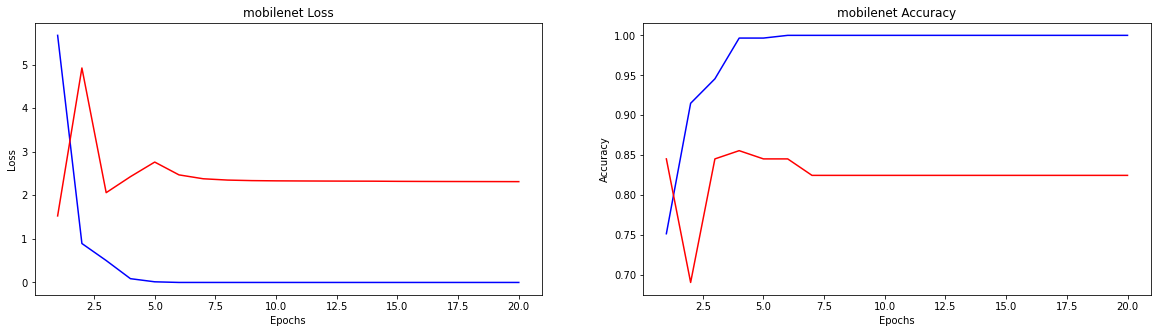

Epoch 1/20
10/10 [==============================] - 28s 993ms/step - loss: 48.2941 - accuracy: 0.5442 - val_loss: 0.7699 - val_accuracy: 0.5567
Epoch 2/20
10/10 [==============================] - 5s 478ms/step - loss: 0.7048 - accuracy: 0.4898 - val_loss: 0.6936 - val_accuracy: 0.4433
Epoch 3/20
10/10 [==============================] - 5s 480ms/step - loss: 0.6936 - accuracy: 0.4422 - val_loss: 0.6935 - val_accuracy: 0.4433
Epoch 4/20
10/10 [==============================] - 5s 464ms/step - loss: 0.6934 - accuracy: 0.4422 - val_loss: 0.6932 - val_accuracy: 0.4433
Epoch 5/20
10/10 [==============================] - 5s 466ms/step - loss: 0.6898 - accuracy: 0.5102 - val_loss: 0.6931 - val_accuracy: 0.5567
Epoch 6/20
10/10 [==============================] - 5s 466ms/step - loss: 0.6930 - accuracy: 0.5578 - val_loss: 0.6929 - val_accuracy: 0.5567
Epoch 7/20
10/10 [==============================] - 5s 463ms/step - loss: 0.7232 - accuracy: 0.5544 - val_loss: 0.6927 - val_accuracy: 0.5567
Epoc

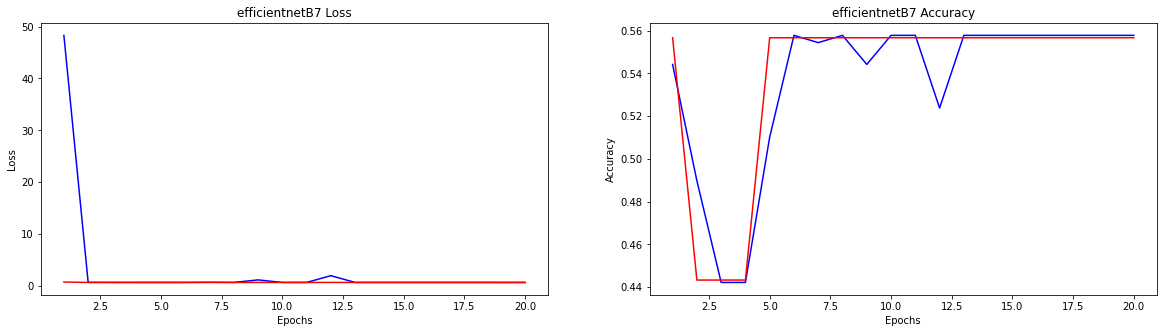

In [63]:
for key, netModel in model_dict.items():
  model = keras.Sequential()
  model.add(netModel)
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation='relu'))
  model.add(keras.layers.Dense(2, activation='softmax')) # 캐글에서는 sigmoid씀 근데 소프트가 더 높음음

  model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  History = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20)
  history_dict = History.history
  model.save(f'/content/drive/MyDrive/pop/model/apple-tomato-classification-{key}-TransferModel.h5')


  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.plot(epoch_runs, history_dict['loss'], 'b', label='Training Loss')
  plt.plot(epoch_runs, history_dict['val_loss'], 'r', label='Validation Loss')
  plt.title(f'{key} Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.subplot(1,2,2)
  plt.plot(epoch_runs, history_dict['accuracy'], 'b', label='Training Accuracy')
  plt.plot(epoch_runs, history_dict['val_accuracy'], 'r', label='Validation Accuracy')
  plt.title(f'{key} Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.show()


  history_list.append(History.history)

In [ ]:
# for i in range(len(history_dict_list)):
#   plt.figure(figsize=(20, 5))
#   plt.subplot(1,2,1)
#   plt.plot(epoch_runs, history_dict_list[i]['loss'], 'b', label='Training Loss')
#   plt.plot(epoch_runs, history_dict_list[i]['val_loss'], 'r', label='Validation Loss')
#   plt.title(f'{model_key[i]} Loss')
#   plt.xlabel('Epochs')
#   plt.ylabel('Loss')

#   plt.subplot(1,2,2)
#   plt.plot(epoch_runs, history_dict_list[i]['accuracy'], 'b', label='Training Accuracy')
#   plt.plot(epoch_runs, history_dict_list[i]['val_accuracy'], 'r', label='Validation Accuracy')
#   plt.title(f'{model_key[i]} Accuracy')
#   plt.xlabel('Epochs')
#   plt.ylabel('Accuracy')
#   plt.show()

In [64]:
# val_loss, val_accuracy가 evaluate 결과(평가값)
for i in range(len(history_list)):
  print('{0}의 loss : {1}'.format(model_key[i], history_list[i]['loss'][-1])) 
  print('{0}의 val_loss : {1}'.format(model_key[i], history_list[i]['val_loss'][-1]))
  print('{0}의 accuracy : {1}'.format(model_key[i], history_list[i]['accuracy'][-1]))
  print('{0}의 val_accuracy : {1}\n'.format(model_key[i], history_list[i]['val_accuracy'][-1]))
  val_acc_list.append(history_list[i]['val_accuracy'][-1])

resnet50의 loss : 0.6897075176239014
resnet50의 val_loss : 0.6896940469741821
resnet50의 accuracy : 0.557823121547699
resnet50의 val_accuracy : 0.5567010045051575

vgg16의 loss : 0.0007975992630235851
vgg16의 val_loss : 0.6532765626907349
vgg16의 accuracy : 1.0
vgg16의 val_accuracy : 0.8556700944900513

xception의 loss : 1.1190986981546303e-07
xception의 val_loss : 4.200832366943359
xception의 accuracy : 1.0
xception의 val_accuracy : 0.8453608155250549

resnet101의 loss : 0.4137286841869354
resnet101의 val_loss : 0.7642126679420471
resnet101의 accuracy : 0.8061224222183228
resnet101의 val_accuracy : 0.5670102834701538

inception의 loss : 6.021174385750783e-07
inception의 val_loss : 1.6796752214431763
inception의 accuracy : 1.0
inception의 val_accuracy : 0.907216489315033

mobilenet의 loss : 5.3135054258746095e-06
mobilenet의 val_loss : 2.3133132457733154
mobilenet의 accuracy : 1.0
mobilenet의 val_accuracy : 0.8247422575950623

efficientnetB7의 loss : 0.6891500353813171
efficientnetB7의 val_loss : 0.689022898674

In [72]:
best_model = model_key[tf.argmax(val_acc_list)]
for key in model_key:
  if best_model != key:
    os.remove(f'/content/drive/MyDrive/pop/model/apple-tomato-classification-{key}-TransferModel.h5')

In [73]:
model = keras.models.load_model(f'/content/drive/MyDrive/pop/model/apple-tomato-classification-{best_model}-TransferModel.h5')


In [74]:
testImage = keras.preprocessing.image.load_img('/content/drive/MyDrive/pop/val_img/val_d.jpg', target_size=(224, 224))
imageArr = np.array(testImage)
imageArr = imageArr/255

In [75]:
print(imageArr.shape)
imageArr = imageArr.reshape(-1, 224, 224, 3)
print(imageArr.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [76]:
pred = model.predict(imageArr)
pred

1/1 [==============================] - 1s 1s/step


array([[6.7147724e-08, 1.0000000e+00]], dtype=float32)

In [77]:

label = np.argmax(pred)
if label == 1:
  y = '사과'
else:
  y = '토마토'
print(y)

사과


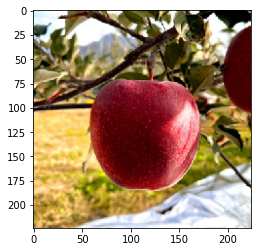

In [78]:

plt.imshow(testImage)
plt.show()

## 모델 저장